Health and medical insurance are a type of insurance that offers medical coverage for expenses incurred by the insured in a medical emergency. In case of medical emergency, health insurance policies act as a financial assistance to the policyholder. As the treatment expenses are increasing every day making it harder for people to afford quality medical treatments, people tend to purchase most suitable health and medical insurance plan for themselves and pay premium price in exchange of medical benefits. The insurance premium may vary depending on the insurance plan, age, profession, family health history, health issues of the insured etcetera. Hence, determining the accurate insurance premium depending on the insured requirements is important to build stronger customer relationship, to customize health insurance plans and to reduce the risk faced by the insurer. Thus, the main objective of this analysis is to help the insurer to improve their policy premium pricing accuracy by predicting the insurance policy premium and identifying the factors that have a huge impact on medical premium price based on the data collected from the individuals. To predict the premium accurately, we can identify the factors that are associated with the yearly health insurance premium price of a person and employ advanced analysis techniques to fit a model on the data, which will result in achieving a model that is capable of predicting the premium price accurately. Based on these predictions, insurer can make better decisions in risk management and when suggesting insurance plans to the customer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Medicalpremium.csv")

In [4]:
df.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


In [5]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

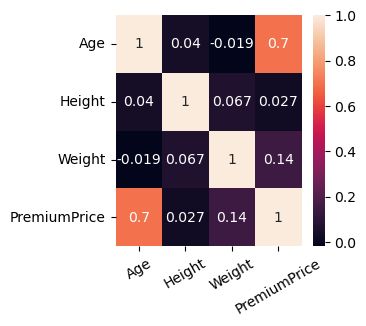

In [8]:
plt.figure(figsize=(3,3))

sns.heatmap(df[["Age", "Height", "Weight", "PremiumPrice"]].corr(), annot=True)
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='Diabetes', ylabel='PremiumPrice'>

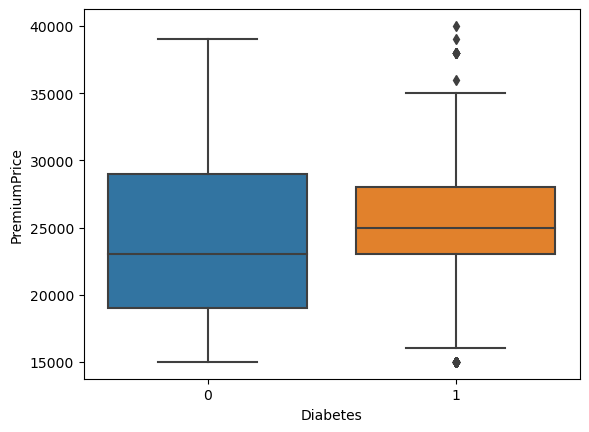

In [9]:
x=df["Diabetes"]
y=df["PremiumPrice"]
sns.boxplot(x=x, y=y, data=df)

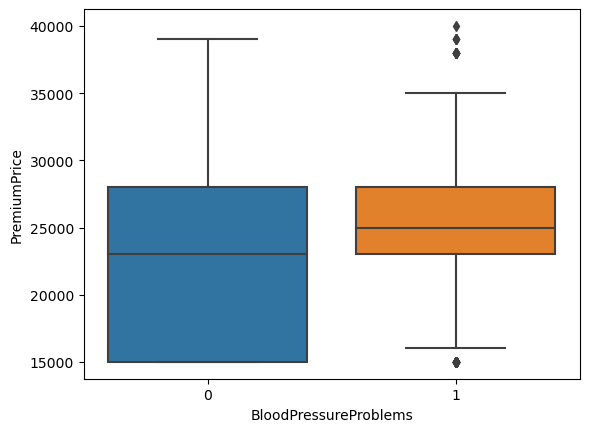

In [10]:
x = df["BloodPressureProblems"]

y = df["PremiumPrice"]

# Using seaborn to create a boxplot
sns.boxplot(data=df, x=x, y="PremiumPrice")
plt.show()

<Axes: xlabel='AnyTransplants', ylabel='PremiumPrice'>

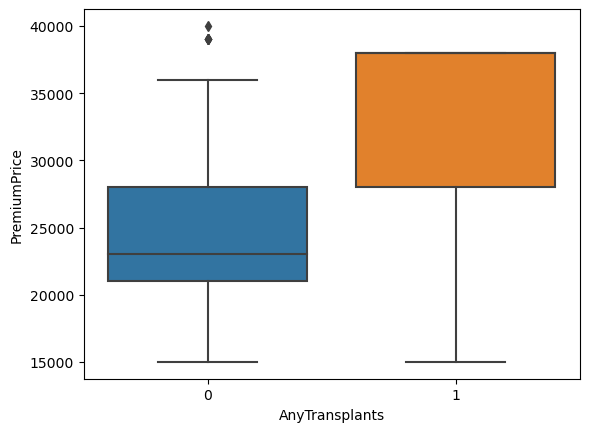

In [11]:
x=df["AnyTransplants"]
y=df["PremiumPrice"]

sns.boxplot(data=df, x=x, y=y)

<Axes: xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

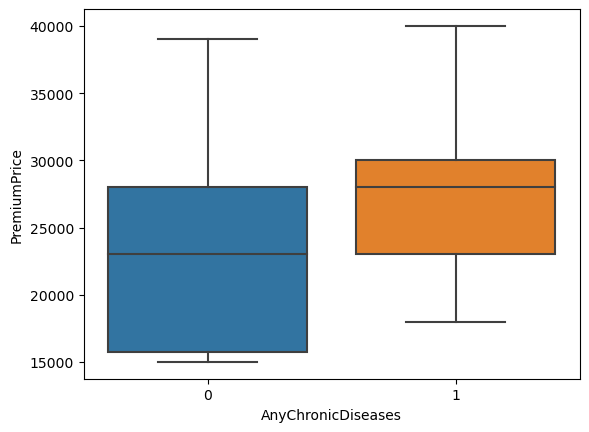

In [12]:
x=df["AnyChronicDiseases"]
y=df["PremiumPrice"]
sns.boxplot(data=df,x=x,y=y)

<Axes: xlabel='KnownAllergies', ylabel='PremiumPrice'>

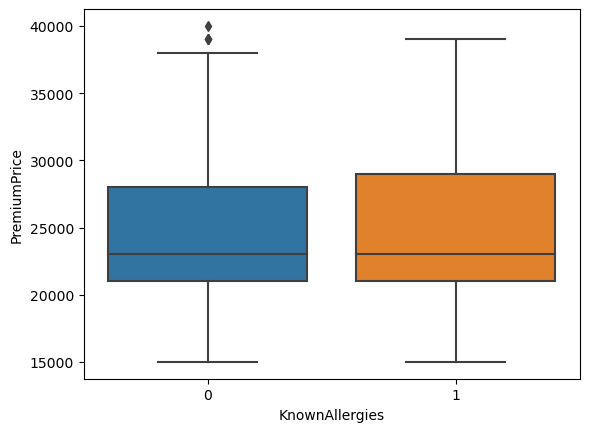

In [13]:
x=df["KnownAllergies"]
y=df["PremiumPrice"]

sns.boxplot(data=df, x=x, y=y)

<Axes: xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

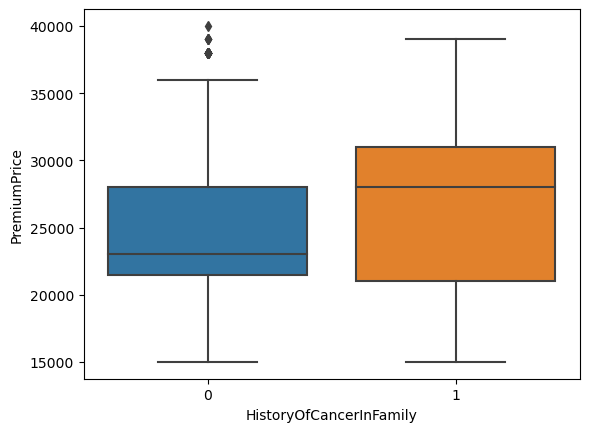

In [14]:
x=df["HistoryOfCancerInFamily"]
y=df["PremiumPrice"]

sns.boxplot(data=df, x=x, y=y)

<Axes: xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

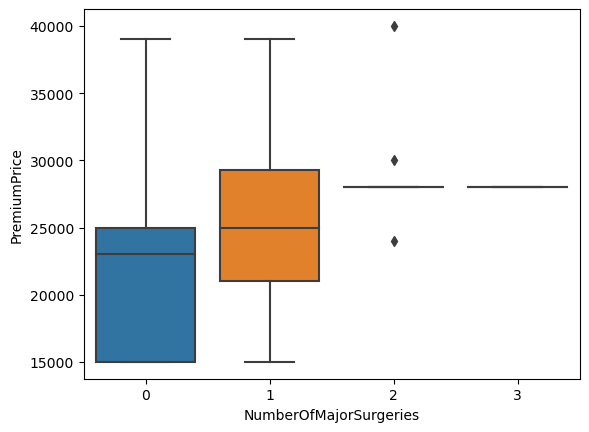

In [15]:
x=df["NumberOfMajorSurgeries"]
y=df["PremiumPrice"]

sns.boxplot(data=df, x=x, y=y)

<Axes: xlabel='PremiumPrice', ylabel='Count'>

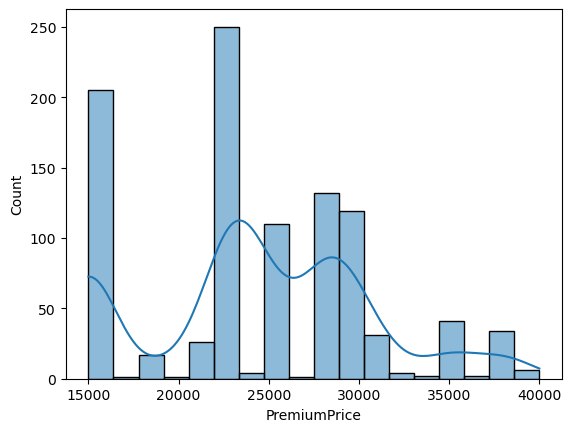

In [16]:
sns.histplot(data=df, x="PremiumPrice", kde=True)

In [17]:
df[["NumberOfMajorSurgeries","KnownAllergies"]].value_counts()

NumberOfMajorSurgeries  KnownAllergies
0                       0                 426
1                       0                 227
                        1                 145
2                       0                 105
0                       1                  53
3                       0                  16
2                       1                  14
dtype: int64

<Axes: xlabel='Age', ylabel='PremiumPrice'>

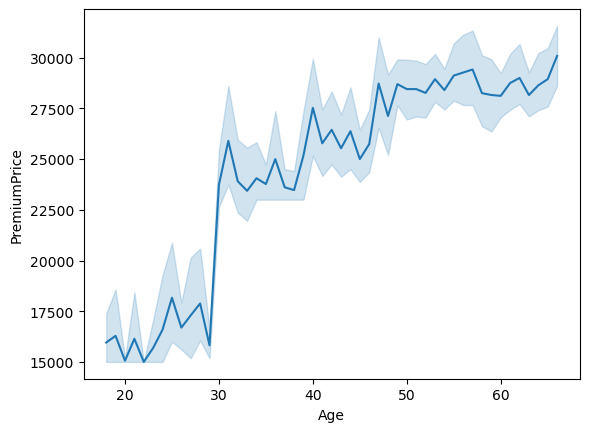

In [18]:
sns.lineplot(x="Age", y="PremiumPrice", data=df)

<Axes: xlabel='Weight', ylabel='PremiumPrice'>

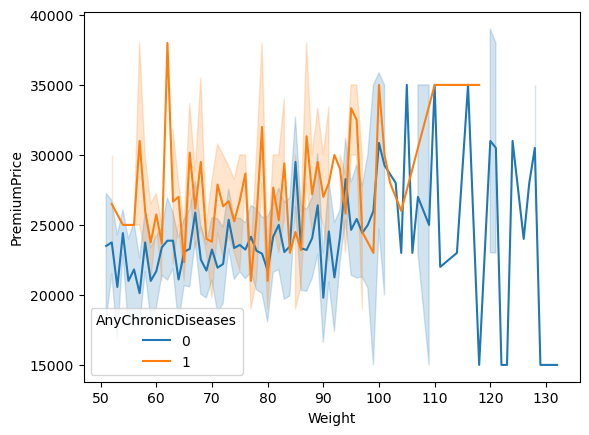

In [19]:
sns.lineplot(x="Weight", y="PremiumPrice", hue="AnyChronicDiseases", data=df)

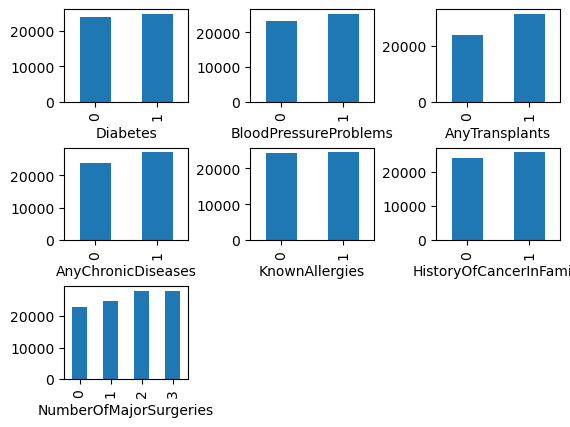

In [20]:
cat= ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
c=1
for feature in cat:
    plt.subplot(3,3,c)
    df.groupby(feature)["PremiumPrice"].mean().plot.bar()
    c=c+1
plt.subplots_adjust(hspace=0.5, wspace=0.5)    
plt.show()

C:\Users\mukhe\AppData\Local\Temp\ipykernel_2688\2381591111.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x="PremiumPrice", data=df, hue=feature,alpha =0.4, fill=True)


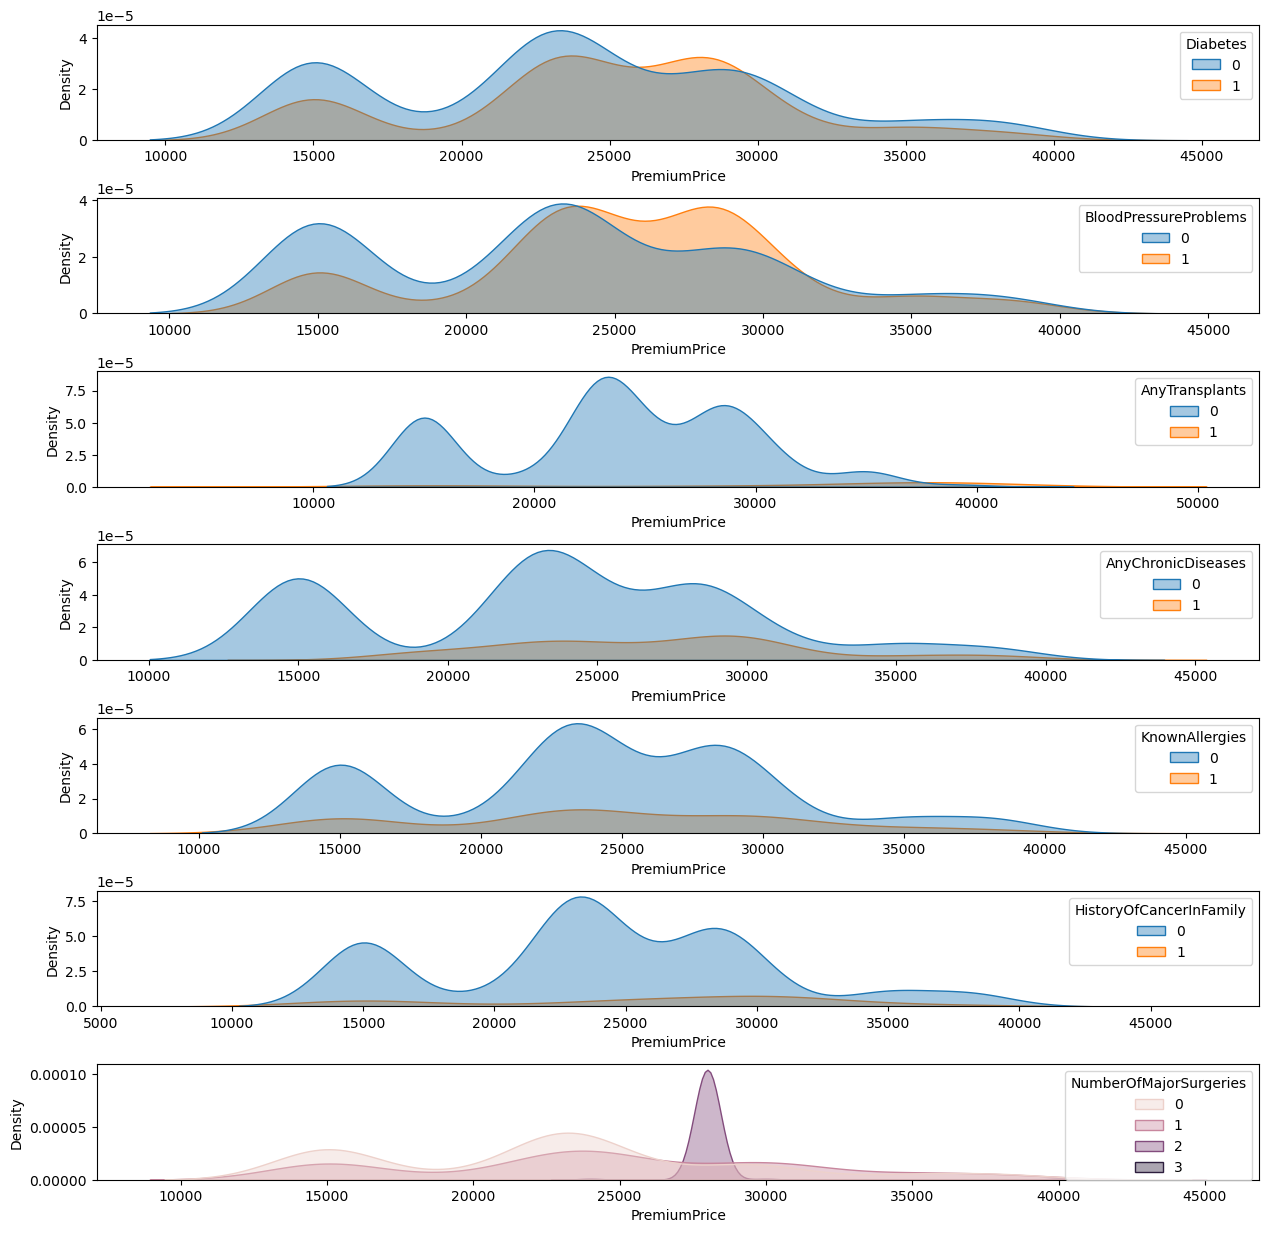

In [21]:
plt.figure(figsize=(15,15))
cat= ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
c=1
for feature in cat:
    plt.subplot(7,1,c)
    sns.kdeplot(x="PremiumPrice", data=df, hue=feature,alpha =0.4, fill=True)
    c=c+1

plt.subplots_adjust(hspace=0.5, wspace=0.5)    
plt.show()

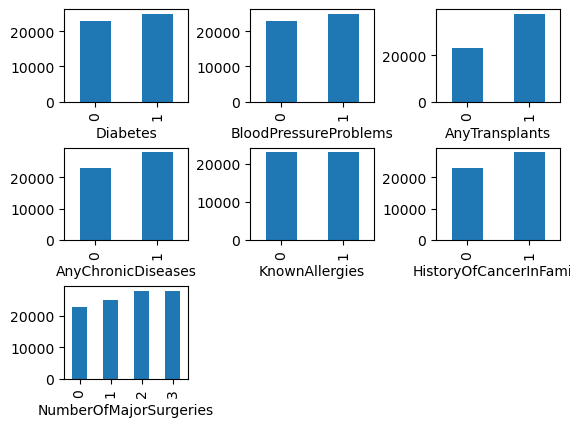

In [22]:
cat= ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
c=1
for feature in cat:
    plt.subplot(3,3,c)
    df.groupby(feature)["PremiumPrice"].median().plot.bar()
    c=c+1
plt.subplots_adjust(hspace=0.5, wspace=0.5)    
plt.show()

Creating new variables

As discussed earlier, weight and height doesn’t seem to have a big effect on the premium price. So, creating new variable BMI using these variables might have an impact on the premium price.

It's quite hard to come up with a conclusion using only the BMI value. therefore, assigning people to one of the below categories according to their BMI value and analyzing them might give us a good insight.

BMI less than 18.5, falls within the underweight range.

BMI 18.5 to <25, falls within the normal weight range.

BMI 25.0 to <30, falls within the overweight range.

BMI 30.0 or higher, falls within the obesity range

In [23]:
df["BMI"]= df["Weight"].values//((df["Height"].values/100)**2)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.0
1,60,1,0,0,0,180,73,0,0,0,29000,22.0
2,36,1,1,0,0,158,59,0,0,1,23000,23.0
3,52,1,1,0,1,183,93,0,0,2,28000,27.0
4,38,0,0,0,1,166,88,0,0,1,23000,31.0


In [24]:
under_weight = df[df.BMI < 18.5].index
healthy_weight = df[(df.BMI >=18.5) & (df.BMI < 25)].index
over_weight = df[(df.BMI >= 25) & (df.BMI < 30)].index
obesity = df[(df.BMI >= 30)].index

df.loc[under_weight, "BMI_status"]= "Under Weight"
df.loc[healthy_weight, "BMI_status"]= "Normal"
df.loc[over_weight, "BMI_status"]= "Over Weight"
df.loc[obesity, "BMI_status"]= "Obese"

<Axes: xlabel='BMI_status', ylabel='PremiumPrice'>

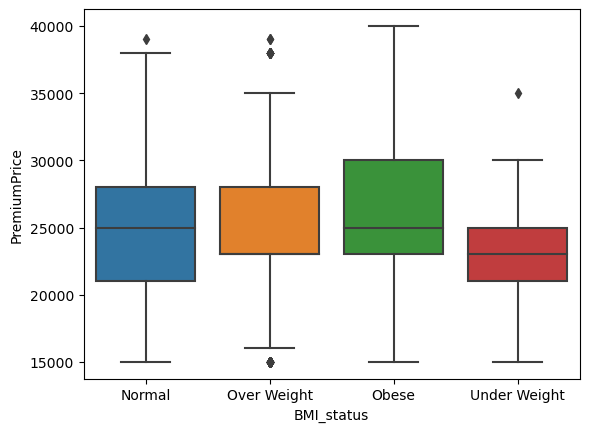

In [25]:
sns.boxplot(x='BMI_status', y='PremiumPrice', data=df)

In [26]:
bmi = pd.get_dummies(df["BMI_status"])
df= pd.concat([df, bmi], axis=1)
df= df.drop("BMI_status", axis=1)

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,Normal,Obese,Over Weight,Under Weight
0,45,0,0,0,0,155,57,0,0,0,25000,23.0,1,0,0,0
1,60,1,0,0,0,180,73,0,0,0,29000,22.0,1,0,0,0
2,36,1,1,0,0,158,59,0,0,1,23000,23.0,1,0,0,0
3,52,1,1,0,1,183,93,0,0,2,28000,27.0,0,0,1,0
4,38,0,0,0,1,166,88,0,0,1,23000,31.0,0,1,0,0


In [27]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'Normal', 'Obese', 'Over Weight', 'Under Weight'],
      dtype='object')

Random Forest Regression

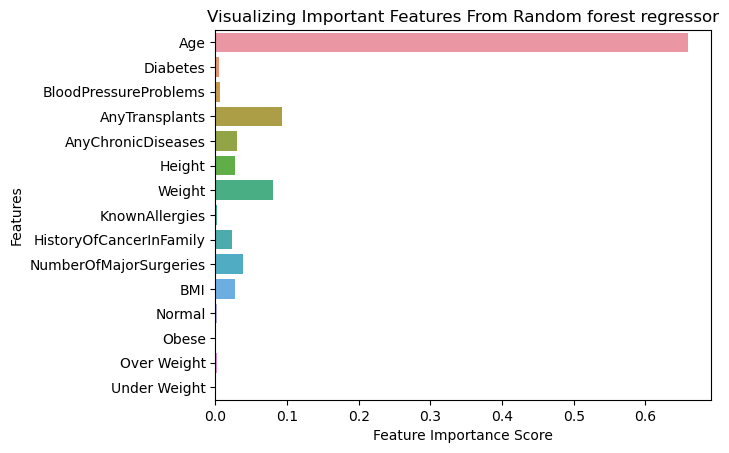

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
feature_imp1 = random_forest.feature_importances_

sns.barplot(x=feature_imp1, y=X.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest regressor")
plt.show()

In [29]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


X = df.drop(['PremiumPrice', "Normal", "Obese", "Over Weight", "Under Weight", "KnownAllergies", "Diabetes", "BloodPressureProblems"], axis=1)
y = df['PremiumPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Value': [mse, mae, r2]
})

metrics_df

,Metric,Value
0,Mean Squared Error (MSE),4.608392e+06
1,Mean Absolute Error (MAE),9.940404e+02
2,R-squared (R2),8.919303e-01


In [39]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


X = df.drop(['PremiumPrice', "Normal", "Obese", "Over Weight", "Under Weight", "KnownAllergies", "Diabetes", "BloodPressureProblems"], axis=1)
y = df['PremiumPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Value': [mse, mae, r2]
})

for model, values in metrics.items():
    print(model)
    for metric, score in values.items():
        print(f"{metric}: {score}")
    print()

Linear Regression
MSE: 12367695.383386496
MAE: 2605.6360474739354
R-squared: 0.709969846407944

Ridge Regression
MSE: 12418173.3466883
MAE: 2611.5407698872336
R-squared: 0.7087861067543055

Lasso Regression
MSE: 12374279.56152179
MAE: 2606.3458537646256
R-squared: 0.7098154433331059



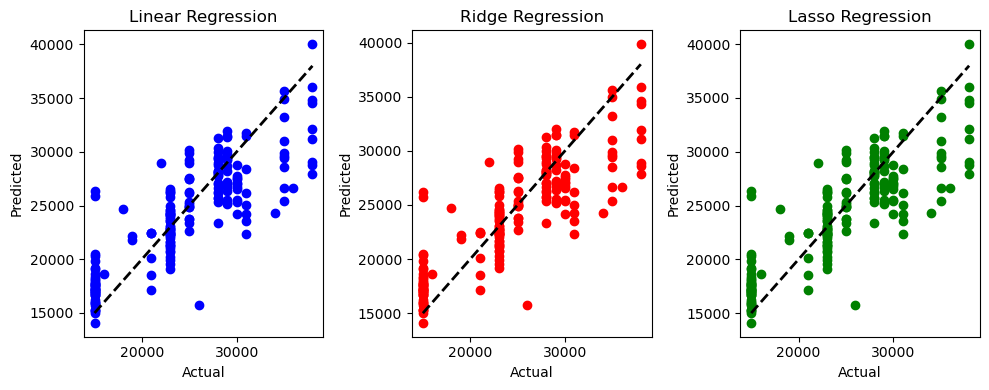

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_linear = linear_regression.predict(X_test)

# Ridge Regression
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train, y_train)
y_pred_ridge = ridge_regression.predict(X_test)

# Lasso Regression
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train, y_train)
y_pred_lasso = lasso_regression.predict(X_test)

# Plotting
plt.figure(figsize=(10,4))

# Plotting actual vs predicted for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting actual vs predicted for Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting actual vs predicted for Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Lasso Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

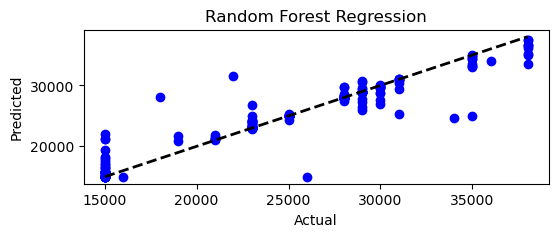

In [36]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)


plt.figure(figsize=(6,2))


plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()